# Prosper Loan Data Exploration (Data Analysis Easy Steps )
## by Omar Elsherif

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.<br>
> Data dictionary to understand the variables more form this link: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0
<br> <br>
We are trying to answer these questions
  1. What factors affect a loan’s outcome status?
  2. What affects the borrower’s APR or interest rate?
  3. Are there differences between loans depending on how large the original loan amount was?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv("prosperLoanData.csv")

high-level overview of data shape and composition


In [3]:
loans.shape


(113937, 81)

In [4]:
loans.head()


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


> Out of the 113937 rows and 81 columns, I am going to select only the columns that are related to our exploration of the loan. I will chose about 15 columns to investigate. These columns are related to the amount of loan, dates, rates and other charactrestics about the borrowers.

In [5]:
df_loans = loans.loc[:, ['ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR',
                         'BorrowerRate', 'LenderYield', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
                         'BorrowerState', 'Occupation', 'EmploymentStatus', 'AmountDelinquent',
                         'IncomeRange', 'StatedMonthlyIncome',
                         'LoanCurrentDaysDelinquent',
                         'LoanOriginalAmount', 'LoanOriginationDate', 
                         'MonthlyLoanPayment', 'LP_ServiceFees', 'Investors']]
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
ListingCreationDate          113937 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
ClosedDate                   55089 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
LenderYield                  113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
AmountDelinquent             106315 non-null float64
IncomeRange                  113937 non-null object
StatedMonthlyIncome          113937 non-null float64
LoanCurrentDaysDelinquent    113937 non-null int64
LoanO

In [6]:
df_loans.duplicated().sum()


0

In [7]:
df_loans.isnull().sum()


ListingCreationDate              0
Term                             0
LoanStatus                       0
ClosedDate                   58848
BorrowerAPR                     25
BorrowerRate                     0
LenderYield                      0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
AmountDelinquent              7622
IncomeRange                      0
StatedMonthlyIncome              0
LoanCurrentDaysDelinquent        0
LoanOriginalAmount               0
LoanOriginationDate              0
MonthlyLoanPayment               0
LP_ServiceFees                   0
Investors                        0
dtype: int64

In [8]:
df_loans.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,EmploymentStatus,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_ServiceFees,Investors
0,2007-08-26 19:09:29.263000000,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,0,...,Self-employed,472.0,"$25,000-49,999",3083.333333,0,9425,2007-09-12 00:00:00,330.43,-133.18,258
1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,A,7.0,2,...,Employed,0.0,"$50,000-74,999",6125.000000,0,10000,2014-03-03 00:00:00,318.93,0.00,1
2,2007-01-05 15:00:47.090000000,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,0,...,Not available,NaN,Not displayed,2083.333333,0,3001,2007-01-17 00:00:00,123.32,-24.20,41
3,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,A,9.0,16,...,Employed,10056.0,"$25,000-49,999",2875.000000,0,10000,2012-11-01 00:00:00,321.45,-108.01,158
4,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,D,4.0,2,...,Employed,0.0,"$100,000+",9583.333333,0,15000,2013-09-20 00:00:00,563.97,-60.27,20


In [9]:
#Adjust Datetime columns
df_loans['ListingCreationDate'] = pd.to_datetime(df_loans['ListingCreationDate']) 
df_loans['ClosedDate'] = pd.to_datetime(df_loans['ClosedDate'])
df_loans['LoanOriginationDate'] = pd.to_datetime(df_loans['LoanOriginationDate'])
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
ListingCreationDate          113937 non-null datetime64[ns]
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
ClosedDate                   55089 non-null datetime64[ns]
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
LenderYield                  113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
AmountDelinquent             106315 non-null float64
IncomeRange                  113937 non-null object
StatedMonthlyIncome          113937 non-null float64
LoanCurrentDaysDelinquent    113937 non-

In [10]:
# Convert ProsperRating & IncomeRange to ordinal categorical 
ordinal_var_dict = {'ProsperRating (Alpha)': ['N/A','HR','E','D','C', 'B', 'A', 'AA'],
                    'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_loans[var] = df_loans[var].astype(ordered_var)

In [11]:
df_loans['ProsperRating (Alpha)'].value_counts()

C      18345
B      15581
A      14551
D      14274
E       9795
HR      6935
AA      5372
N/A        0
Name: ProsperRating (Alpha), dtype: int64

In [12]:
df_loans['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$1-24,999          7274
$0                  621
Name: IncomeRange, dtype: int64

In [13]:
#Adjust datatype for all other categorical columns
df_loans['Occupation'] = df_loans['Occupation'].astype('category')
df_loans['BorrowerState'] = df_loans['BorrowerState'].astype('category')
df_loans['LoanStatus'] = df_loans['LoanStatus'].astype('category')
df_loans['ListingCategory (numeric)'] = df_loans['ListingCategory (numeric)'].astype('category')
df_loans['EmploymentStatus'] = df_loans['EmploymentStatus'].astype('category')


In [14]:
df_loans['Occupation'].value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [15]:
df_loans.shape

(113937, 22)

In [16]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
ListingCreationDate          113937 non-null datetime64[ns]
Term                         113937 non-null int64
LoanStatus                   113937 non-null category
ClosedDate                   55089 non-null datetime64[ns]
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
LenderYield                  113937 non-null float64
ProsperRating (Alpha)        84853 non-null category
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null category
BorrowerState                108422 non-null category
Occupation                   110349 non-null category
EmploymentStatus             111682 non-null category
AmountDelinquent             106315 non-null float64
IncomeRange                  105390 non-null category
StatedMonthlyIncome          113937 non-null float64
LoanCurrentDaysDelinquent

### What is the structure of your dataset?

> The dataset contains 113937 rows and 22 columns. Most of the columns are numeric but we also have categorical variables(both ordinal and nominal) and datetime variables.

### What is/are the main feature(s) of interest in your dataset?
I will work with Borrower Rate, Borrower APR, Prosper Score, Credit Score, Original Loan Amount, Monthly Payment, Borrower Occupation, Borrower State and others if needed.
> There are some important features to look at including:
* BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
* ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or * lowest risk score. Applicable for loans originated after July 2009.
* LoanOriginationDate: The date the loan was originated.
* LenderYield: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that *Loan Status* and *Employment Status* will have a strong impact on loan and the features we are trying to explor. Also the *Monthly Income* will play a role here and the *Term* (lenght of the loan) may have an effect. SO I will try to invistigate these more.


## Univariate Exploration
I will start with the most important features: Borrower APR , Prosper Score and Loan Original Amount

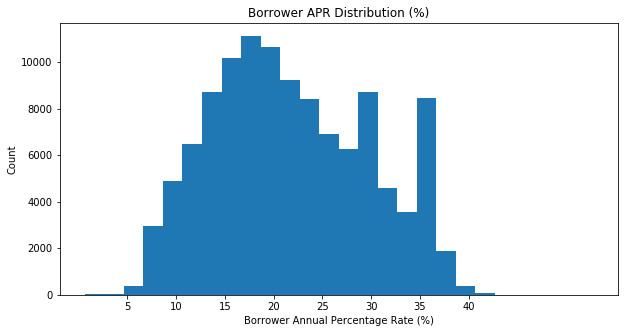

In [17]:
# Distribution of Borrower APR in percentage 
binsize = 2
borrowe_APR_percentage = df_loans['BorrowerAPR']*100
bins = np.arange(df_loans['BorrowerAPR'].min()*100, df_loans['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = borrowe_APR_percentage, bins = bins)
plt.title('Borrower APR Distribution (%)')
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Count')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5','10', '15', '20', '25', '30', '35', '40'])
plt.show()


> We see that the Borrower APR is normally distrubuted with the peak between 15 and 20 percent in addition we have some increase in the 35 percent

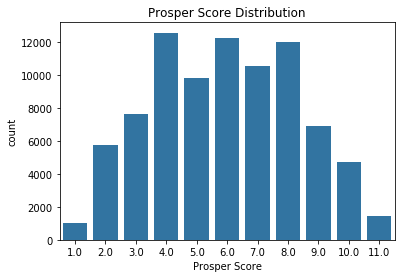

In [18]:
#Prosper Score Distribution (range form 1 to 10)
base_color = sb.color_palette()[0]
sb.countplot(data=df_loans, x= 'ProsperScore', color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');


> Prosper Scores are almost normally distributed and values 4, 6 and 8 are the most common.


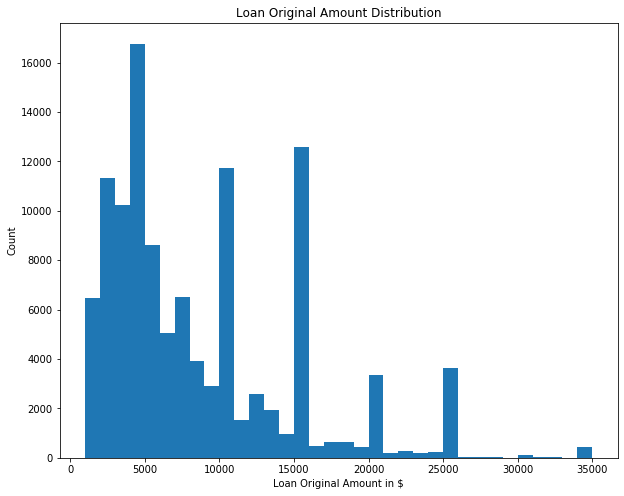

In [19]:
# Loan Original Amount Distribution
binsize = 1000
bins = np.arange(df_loans['LoanOriginalAmount'].min(), df_loans['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = df_loans, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount Distribution')
plt.xlabel('Loan Original Amount in $')
plt.ylabel('Count')
plt.show()

* We see that the distribution is right skewed with a long tail so I will try it in the log scale to see it more better

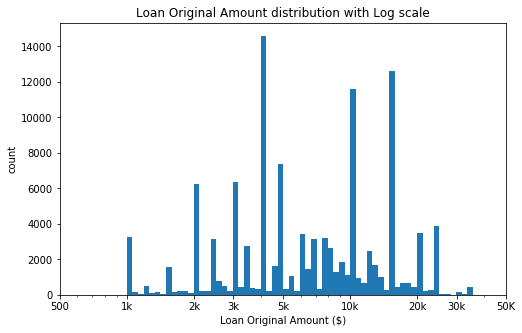

In [20]:
# Putting Loan Original Amount in a log-scale
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(df_loans['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount distribution with Log scale')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('count')
plt.show()

* The highest value for original loan amount is between 3K and 5K. Also I notice increase in amount between 10K and 20K


In [21]:
#Checking loans' term (expressed in months)
df_loans['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

* So we can see that in years terms can be either 1 year (12 month) or 3 years (36 months) or 5 years (60 months)

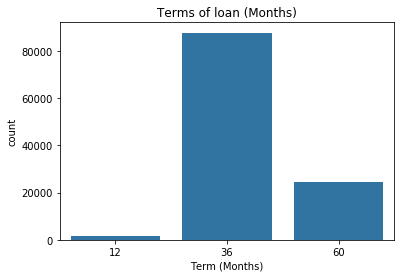

In [22]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_loans,x= 'Term',color=base_color);
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

> we see that most of the values are in the 3 years (36 months)

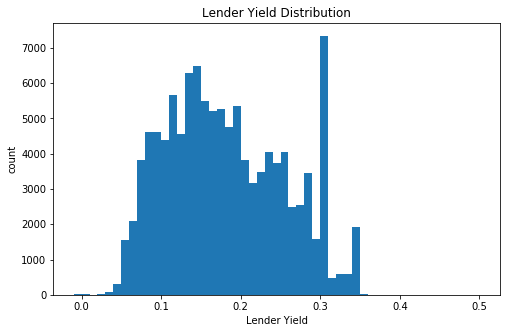

In [24]:
#Lender Yield Distribution
binsize = 0.01
bins = np.arange(df_loans['LenderYield'].min(), df_loans['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'LenderYield', bins = bins)
plt.xlabel('Lender Yield')
plt.title('Lender Yield Distribution')
plt.ylabel('count')
plt.show()

> we see that Lender Yield is nomarlly distributed with most of the values between 0.1 and 0.2 and we notice an increase at 0.3

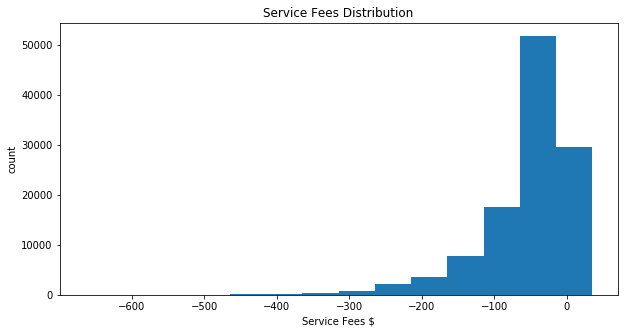

In [25]:
# Service Fees Distribution
binsize = 50
bins = np.arange(df_loans['LP_ServiceFees'].min(), df_loans['LP_ServiceFees'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loans, x = 'LP_ServiceFees', bins = bins)
plt.xlabel('Service Fees $')
plt.title('Service Fees Distribution')
plt.ylabel('count')
plt.show()

> We see that service fees are left skewed but we can't put it in the log scale because of the negative values.

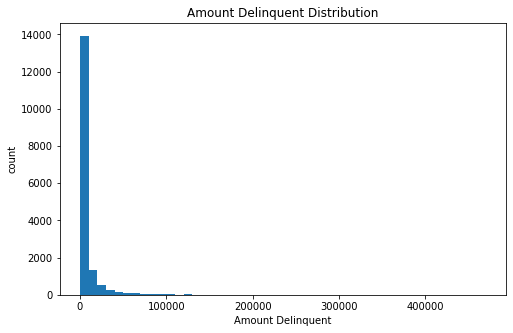

In [26]:
#Amount Delinquent Distribution
binsize = 10000
bins = np.arange(df_loans['AmountDelinquent'].min(), df_loans['AmountDelinquent'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans[df_loans['AmountDelinquent']>0], x = 'AmountDelinquent', bins = bins)
plt.title('Amount Delinquent Distribution')
plt.xlabel('Amount Delinquent')
plt.ylabel('count')
plt.show()

In [27]:
df_loans['AmountDelinquent'].max()

463881.0

In [28]:
df_loans['AmountDelinquent'].min()

0.0

In [29]:
df_loans['AmountDelinquent'].value_counts()

0.0         89818
50.0           73
100.0          67
25.0           66
30.0           65
            ...  
52844.0         1
10776.0         1
19226.0         1
13986.0         1
327677.0        1
Name: AmountDelinquent, Length: 7059, dtype: int64

* We can see that Amount Delinquent is right skewed and we can't see insights from if so let's try log scale
* Also, most of the loans do not have delinquence as we saw that at 0 we have 89818. It is better checking this in log-scale


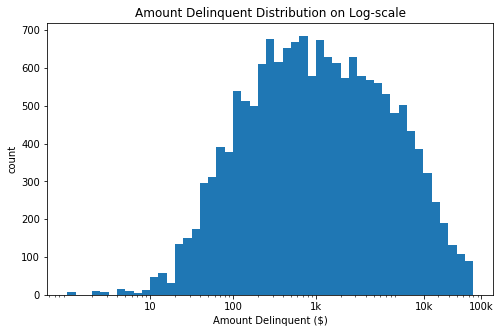

In [30]:
#Amount Delinquent Distribution on a log scale

log_binsize = 0.1
bins = 10 ** np.arange(0,5, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'AmountDelinquent', bins = bins)
plt.title('Amount Delinquent Distribution on Log-scale')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3, 2e4, 1e5], ['10', '100', '1k', '10k', '100k'])
plt.xlabel('Amount Delinquent ($)')
plt.ylabel('count')
plt.show()

* It is obvious that most amounts delinquent falls around $1000 and it is normally distibuted


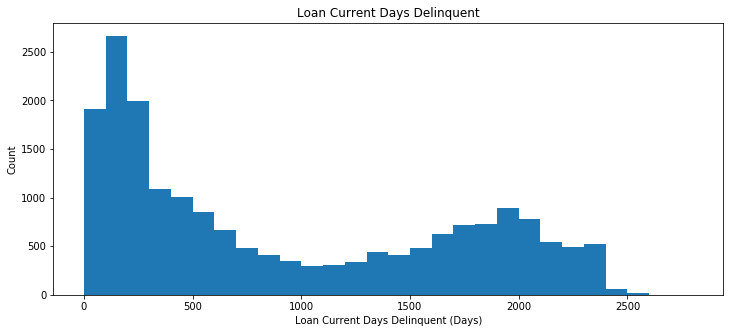

In [31]:
# Loan Current Days Delinquent Distribution
binsize = 100
bins = np.arange(0, df_loans['LoanCurrentDaysDelinquent'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df_loans[df_loans['LoanCurrentDaysDelinquent']>0], x = 'LoanCurrentDaysDelinquent', bins = bins)
plt.title('Loan Current Days Delinquent')
plt.xlabel('Loan Current Days Delinquent (Days)')
plt.ylabel('Count')
plt.show()

> Most of delinquent are on the first 500 days and the distribution is bimodal.

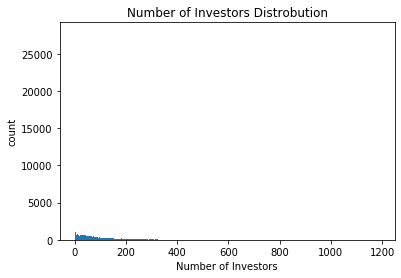

In [32]:
#Number of Investors Distrobution
binsize = 1
bins = np.arange(df_loans['Investors'].min(), df_loans['Investors'].max()+binsize, binsize)

#plt.figure(figsize=[8, 5])
plt.hist(data = df_loans[df_loans['Investors'] > 0], x = 'Investors', bins = bins)
plt.xlabel('Number of Investors')
plt.title('Number of Investors Distrobution')
plt.ylabel('count')
plt.show()

* We can't see this distribution well so let's try log scale as it may work better

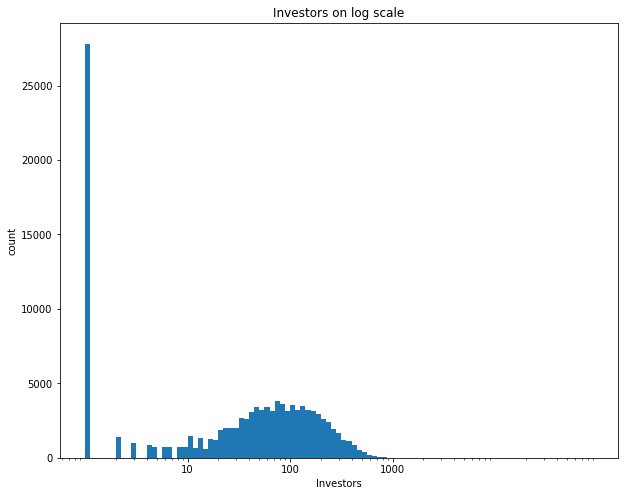

In [33]:
#Number of Investors Distrobution on log scale for all loans
log_binsize = 0.05
bins = 10 ** np.arange(0, 5, log_binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = df_loans, x = 'Investors', bins = bins)
plt.title('Investors on log scale')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3], ['10', '100', '1000'])
plt.xlabel('Investors')
plt.ylabel('count')
plt.show()


> Most of loans has around 100 investors

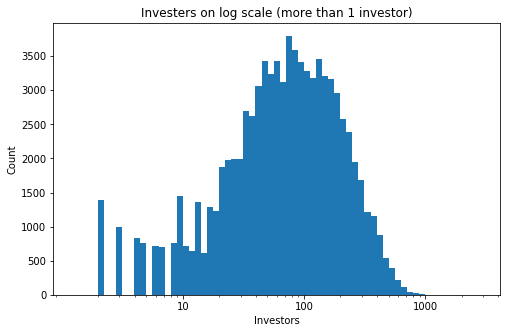

In [34]:
#We can plot the same for only loans with more than 1 investor
log_binsize = 0.05
bins = 10 ** np.arange(0.1, 3.5, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'Investors', bins = bins)
plt.title('Investers on log scale (more than 1 investor)')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3], ['10', '100', '1000'])
plt.xlabel('Investors')
plt.ylabel('Count')
plt.show()

* Number of investors (for data with number of inestoers more than 1) is almost normally distributed around 100 and that was expected from the previce one

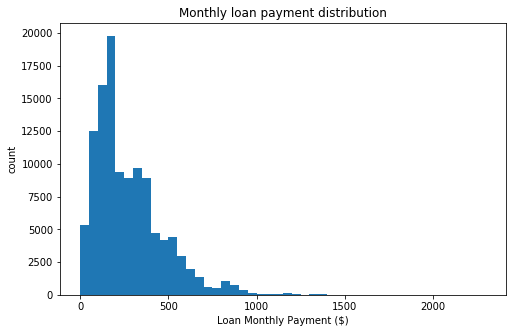

In [35]:
# Monthly loan payment distribution
binsize = 50
bins = np.arange(0, df_loans['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Loan Monthly Payment ($)')
plt.ylabel('count')
plt.title('Monthly loan payment distribution')
plt.show()


* There's a long tail in the distribution, so let's put it on a log scale instead

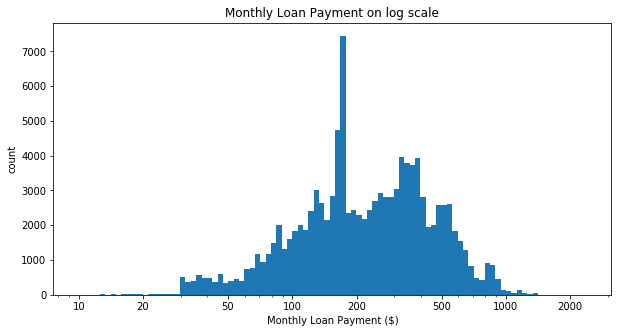

In [36]:
# Using log-scale
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(df_loans['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loans, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 1e3, 2e3], ['10', '20','50', '100', '200', '500', '1000', '2000'])
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('count')
plt.title('Monthly Loan Payment on log scale')
plt.show()

* The is normally distributed with the peak between 100  and 200 and some increase at the 500


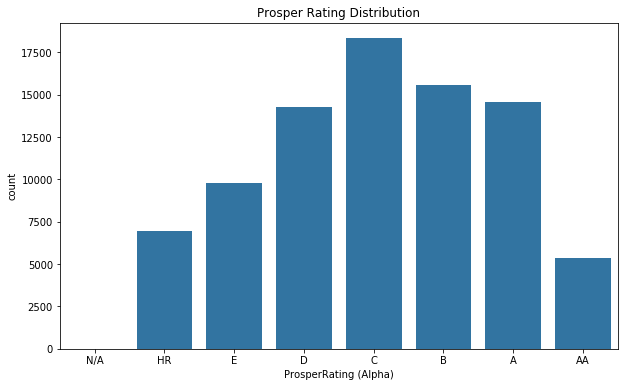

In [37]:
# Prosper Rating Distribution

plt.figure(figsize=[10, 6]);
sb.countplot(data=df_loans,x='ProsperRating (Alpha)',color=base_color);
plt.title('Prosper Rating Distribution');

* Most borrowers get Prosper Rating of 'C'

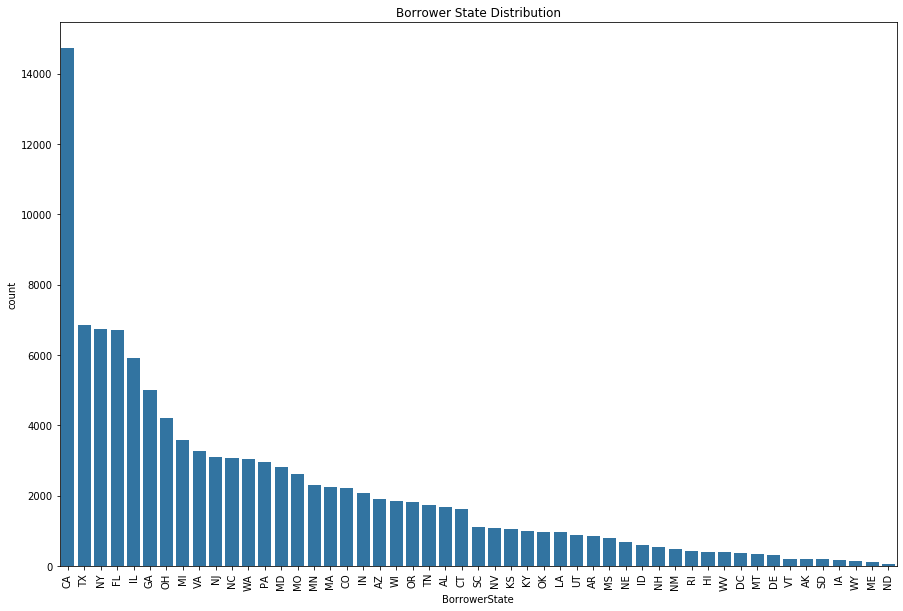

In [38]:
#Borrower State Distrobution
cat_order = df_loans['BorrowerState'].value_counts().index
plt.figure(figsize=[15, 10])
sb.countplot(data=df_loans,x='BorrowerState',color=base_color, order=cat_order);
plt.title('Borrower State Distribution');
plt.xticks(rotation=90);

* We can see that California (CA), Texas (TX) and New York (NY) have the 3 biggest numbers of loans originated in that period of time.

Text(0.5, 1.0, 'Borrower Income Range Distribution')

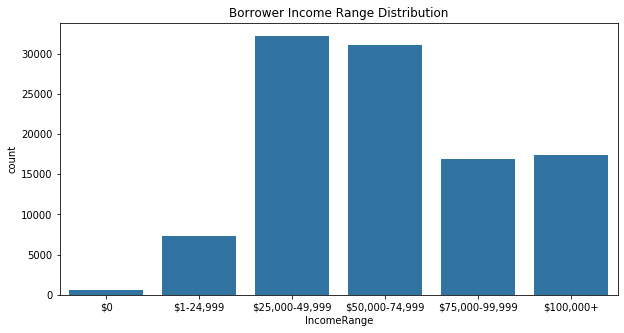

In [39]:
#Borrower Income Range Status Distrobution
plt.figure(figsize=[10, 5])
sb.countplot(data=df_loans,x='IncomeRange',color=base_color);
plt.title('Borrower Income Range Distribution')

* We can see that people with income range of $25,000-49,999 are the ones who are taking loans most



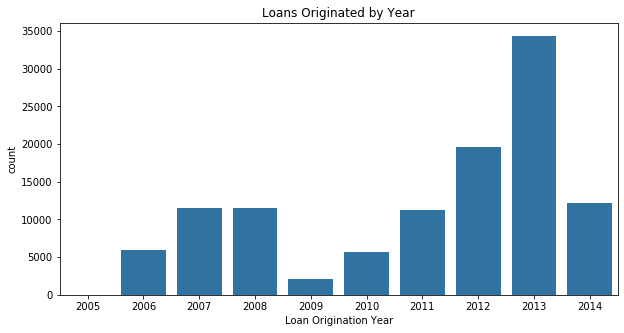

In [40]:
# Loan Origination by Year
plt.figure(figsize=[10, 5])
sb.countplot(data=df_loans,x=df_loans['LoanOriginationDate'].dt.year,color=base_color)
plt.title('Loans Originated by Year')
plt.xlabel('Loan Origination Year');

* We can see that there is a drop in 2009 in loans but it started to increase gradually and reached it's peak at 2013

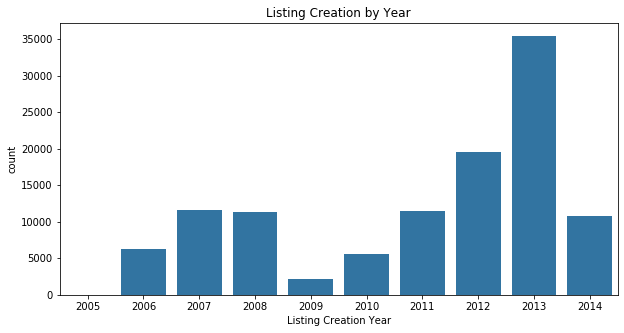

In [41]:
# Listing Creation  by Year
plt.figure(figsize=[10, 5])
sb.countplot(data=df_loans,x=df_loans['ListingCreationDate'].dt.year,color=base_color)
plt.title('Listing Creation by Year')
plt.xlabel('Listing Creation Year');

* The same observation as the previous chart which is expected because we normally create the list every year.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Loan Original Amount distribution is right skewed and I performed log transformation on it to interpret the visualization. I also did the log transformation to these variables: Monthly Loan Payment, Investors and Amount Delinquent.
<br> <br>
> Year 2013 had the highest loan creation. California (CA) had the biggest number of loans. Service fees was left skewed but I couldn't do the log scale because of negative values.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Due to the high difference between AmountDelinquent values the distribution was really on large scale and I couldn't see it clear so I did the log transformation. <br>
> Some features had long-tailed, skewed distributions, these were checked on a log scale to show the hidden distribution in some areas.

## Bivariate Exploration


> To investigate variables in pairs, we need to identify numeric and categorical features in order to select the proper chart type.

In [42]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
ListingCreationDate          113937 non-null datetime64[ns]
Term                         113937 non-null int64
LoanStatus                   113937 non-null category
ClosedDate                   55089 non-null datetime64[ns]
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
LenderYield                  113937 non-null float64
ProsperRating (Alpha)        84853 non-null category
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null category
BorrowerState                108422 non-null category
Occupation                   110349 non-null category
EmploymentStatus             111682 non-null category
AmountDelinquent             106315 non-null float64
IncomeRange                  105390 non-null category
StatedMonthlyIncome          113937 non-null float64
LoanCurrentDaysDelinquent

In [43]:
numeric_variables = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperScore', 
                     'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_ServiceFees', 'Investors',
                    'AmountDelinquent','LoanCurrentDaysDelinquent']

In [44]:
categorical_variables = ['LoanStatus', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 
                         'EmploymentStatus', 'IncomeRange']

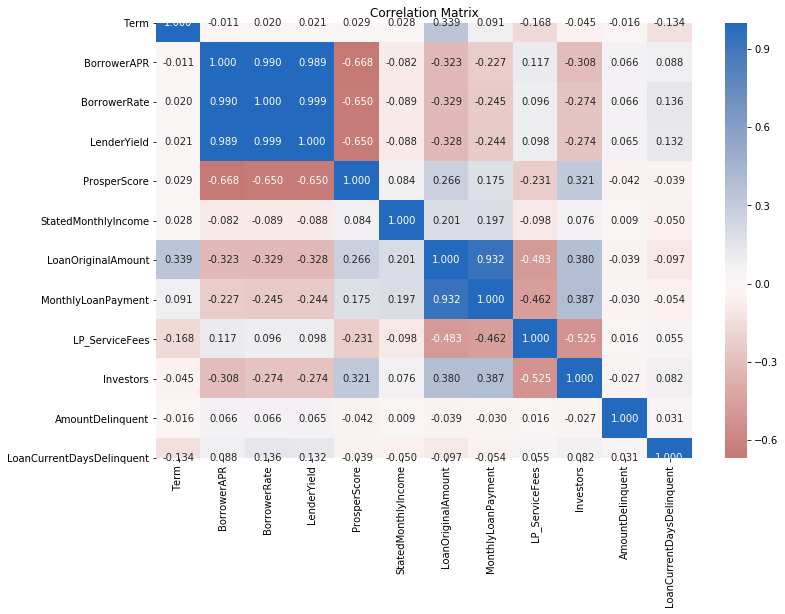

In [45]:
# Correlation matrix for all numeric variables
plt.figure(figsize = [12, 8])
sb.heatmap(df_loans[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.show()

C:\Users\omare\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\omare\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


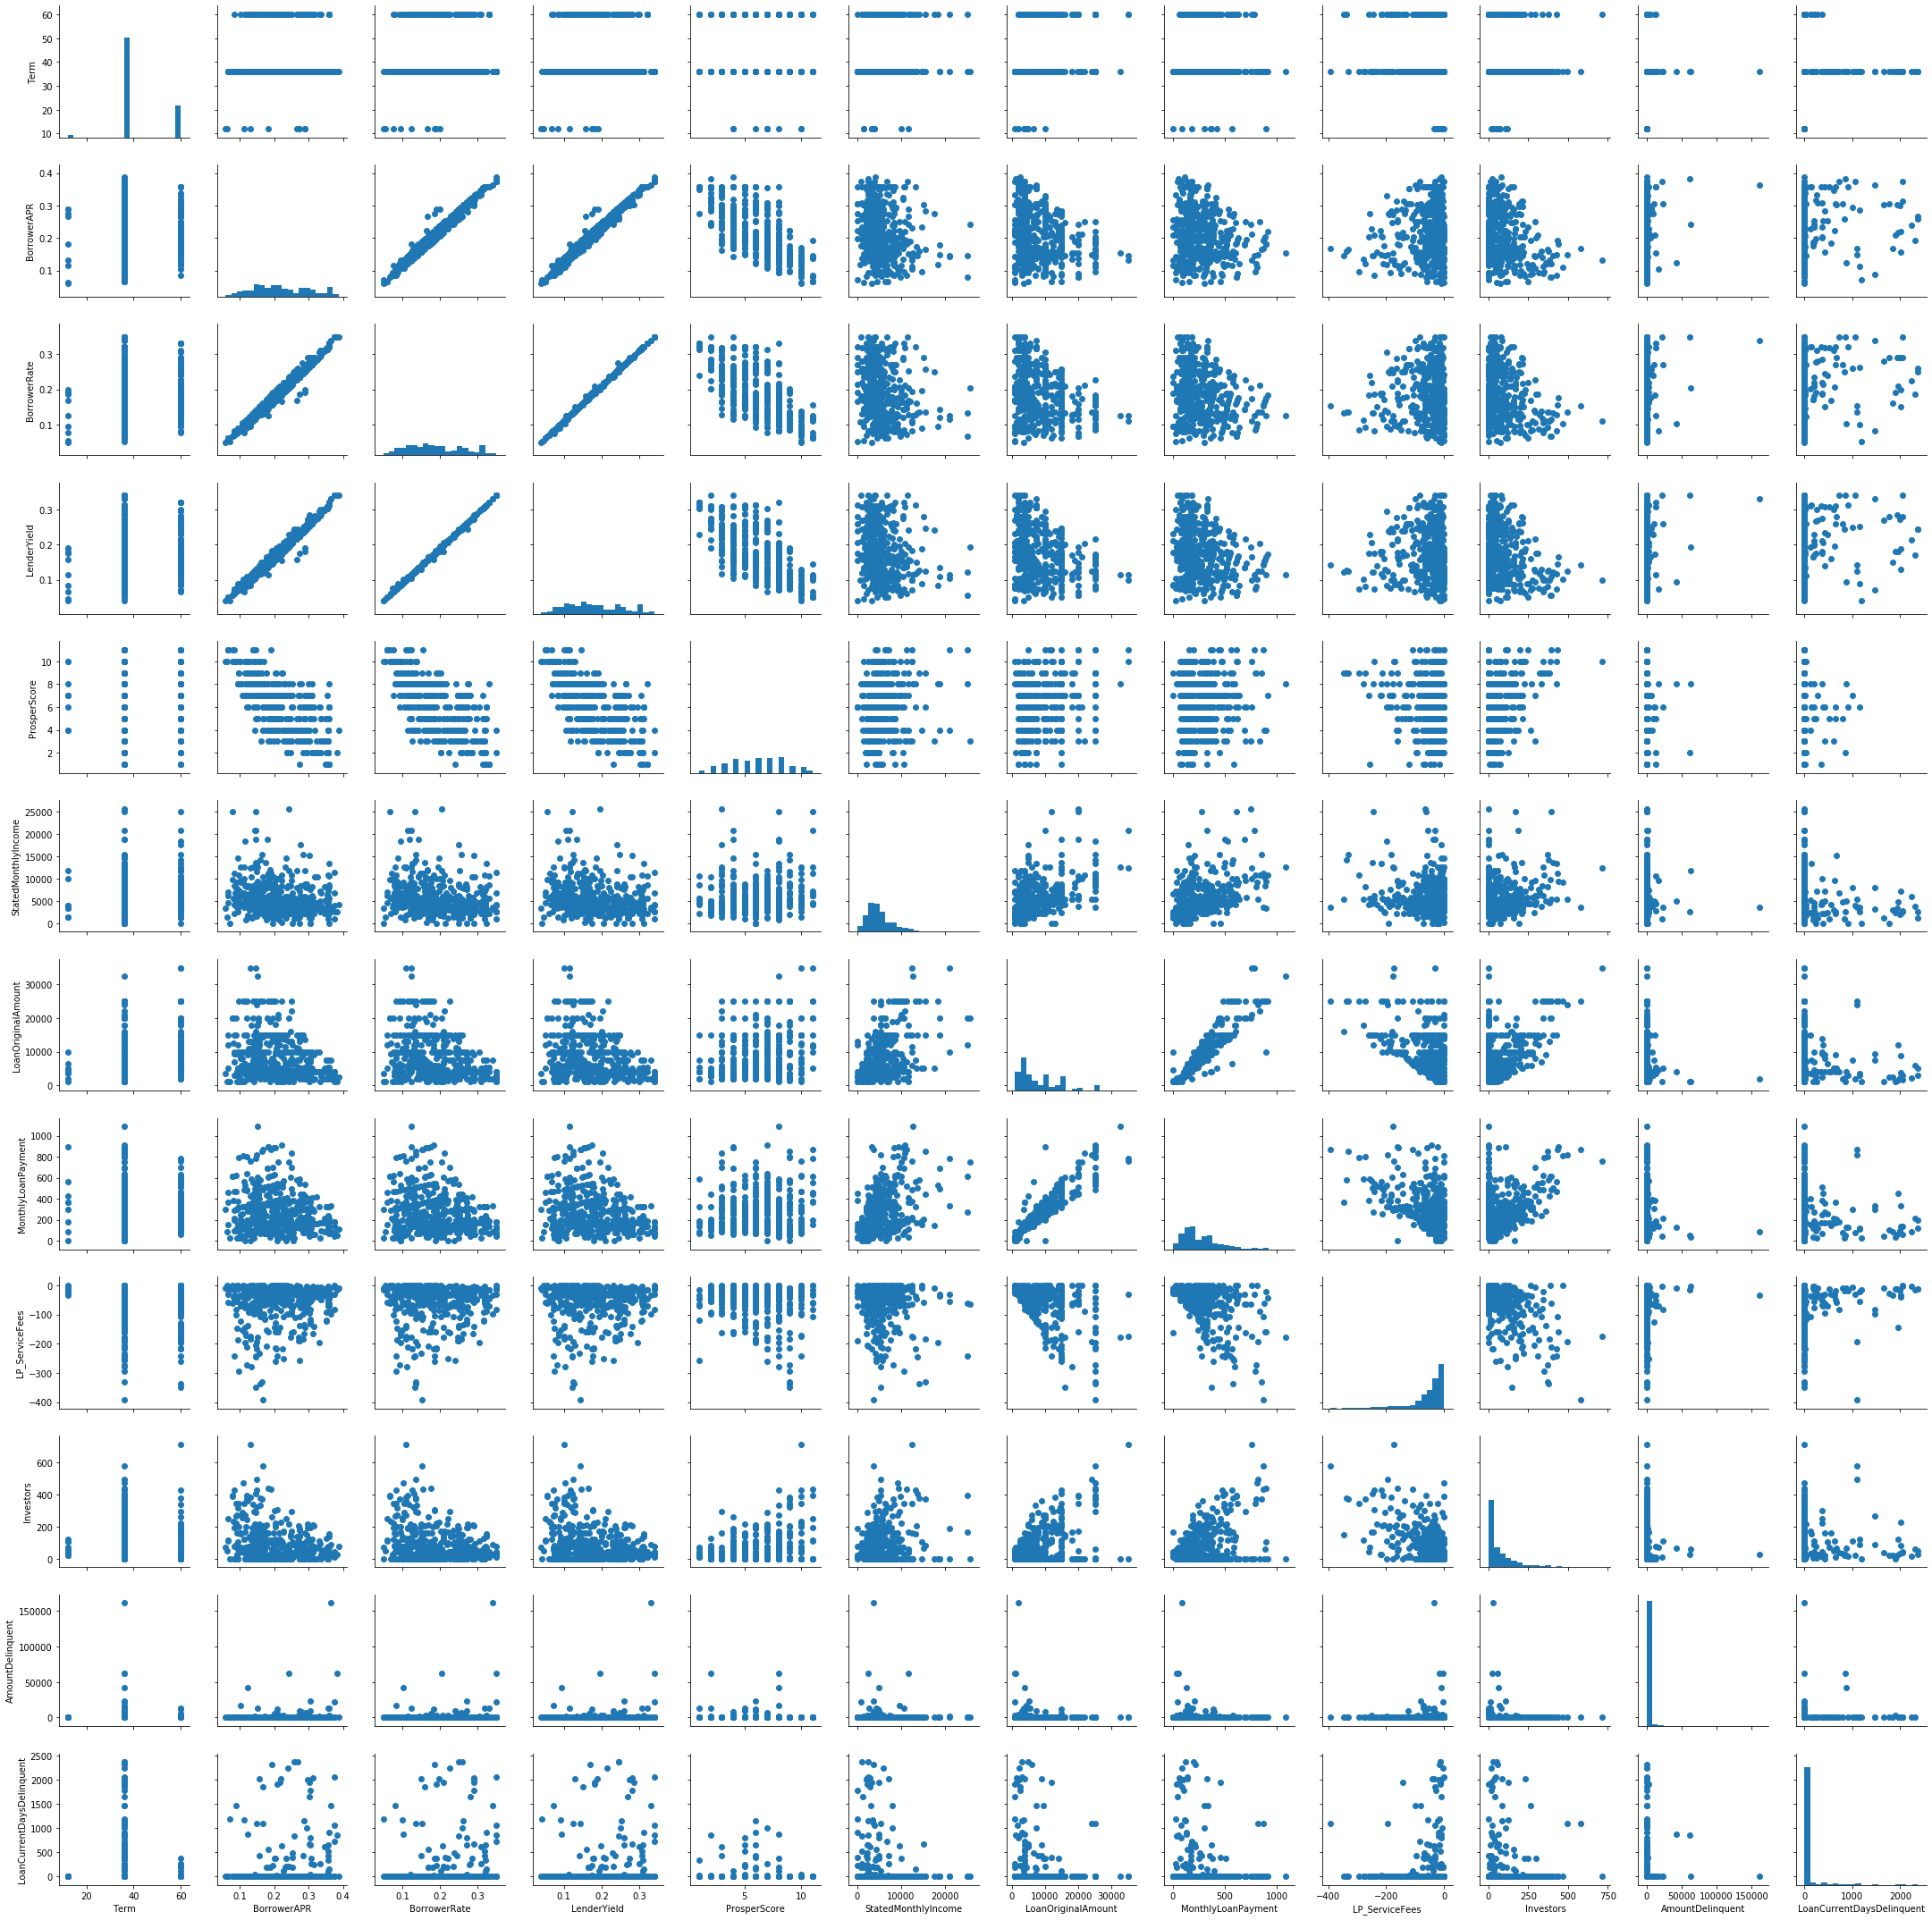

In [46]:
# plot matrix: sample 500 loans so that plots are clearer and
# they render faster
samples = np.random.choice(df_loans.shape[0], 500, replace = False)
df_loans_samp = df_loans.loc[samples,:]

g = sb.PairGrid(data = df_loans_samp, vars = numeric_variables)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

> Strong positive correlations between Lender yield and Borrower APR. Prosper Score and Prosper Rating are also positive correlation. Credit Score upper range has also some weak +ve correlation with prosper score.

> Negative correlation between prosper score & APR, and prosper score & Lender yield. Negative correlation between prosper ratings & APR, and prosper score & Lender yield.


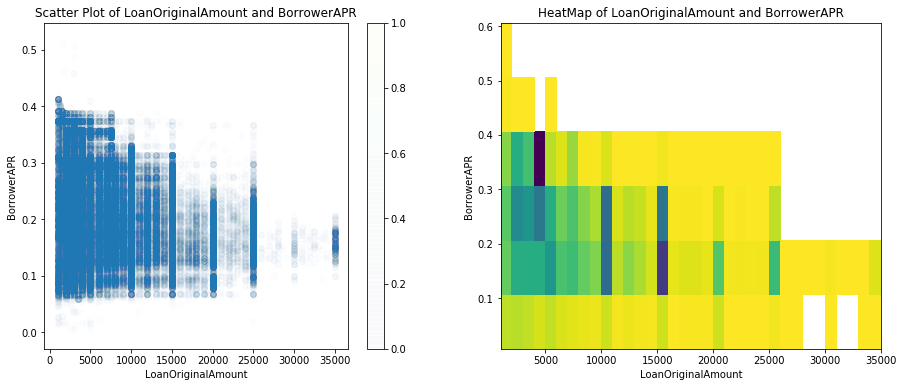

In [47]:
# Checking the relation between LoanOriginalAmount and BorrowerAPR

plt.figure(figsize = [15, 6]) 
plt.subplot(1, 2, 1)
plt.scatter(data = df_loans, x = 'LoanOriginalAmount', y = 'BorrowerAPR',  alpha =  0.01)
plt.title('Scatter Plot of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');
plt.colorbar();

plt.subplot(1, 2, 2)
bins_x = np.arange(df_loans['LoanOriginalAmount'].min(), df_loans['LoanOriginalAmount'].max()+1000, 1000)
bins_y = np.arange(df_loans['BorrowerAPR'].min(), df_loans['BorrowerAPR'].max()+0.1, 0.1)
plt.hist2d(data = df_loans, x = 'LoanOriginalAmount', y = 'BorrowerAPR', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.title('HeatMap of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');

* We see negative relationship between loan original amount and borrower apr, means large loans have relatively less annual interest rate from the borrower.

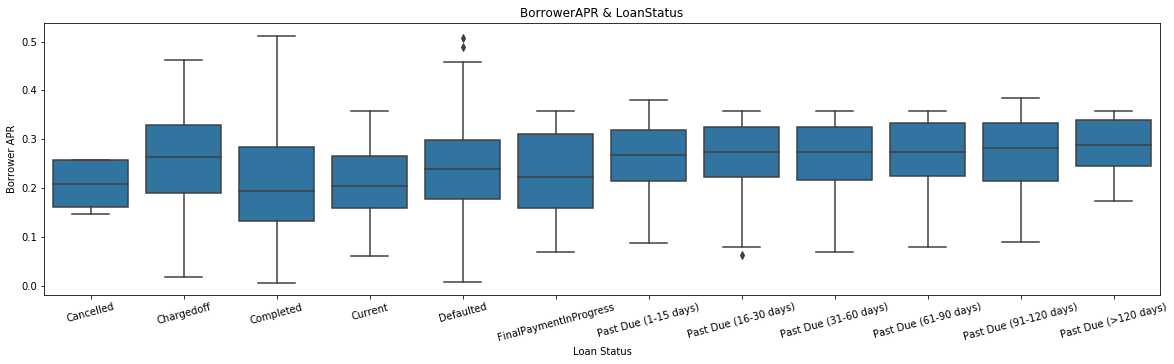

In [48]:
# Borrower APR vs Status of Loan 
plt.figure(figsize = [20, 5])
sb.boxplot(data=df_loans,y='BorrowerAPR',x='LoanStatus',color=base_color);
plt.title('BorrowerAPR & LoanStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Loan Status');
plt.xticks(rotation=15);

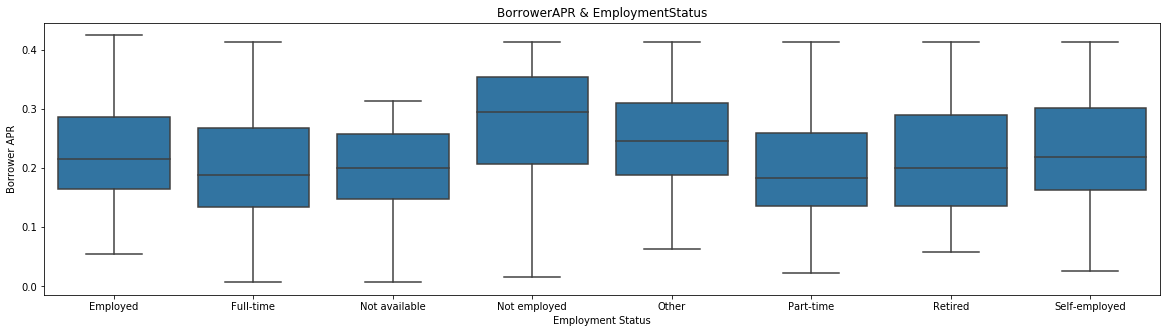

In [49]:
# Borrower APR vs Employment status
plt.figure(figsize = [20, 5])

sb.boxplot(data=df_loans,y='BorrowerAPR',x='EmploymentStatus',color=base_color);
plt.title('BorrowerAPR & EmploymentStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Employment Status');

* On BorrowerAPR vs LoanStatus graph we notice that Current and completed loans have lower rate than the past-due loans and have lower mean.
* On  Borrower APR vs Employment status graph we notice that Employed people have lower IQR than not employed

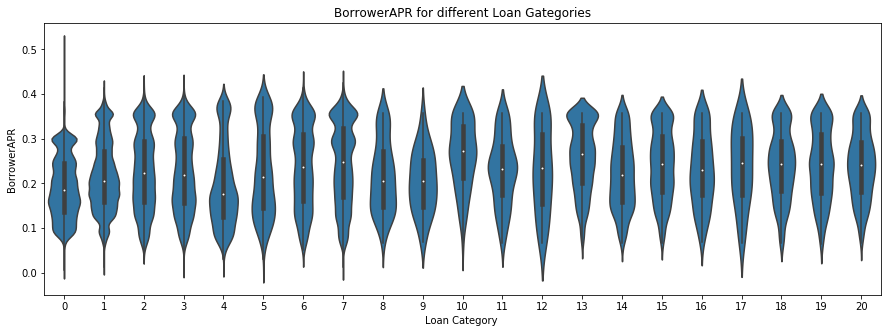

In [50]:
plt.figure(figsize = [15, 5])
sb.violinplot(data=df_loans,x='ListingCategory (numeric)', y='BorrowerAPR',color=base_color);
plt.title('BorrowerAPR for different Loan Gategories')
plt.xlabel('Loan Category ');
plt.ylabel('BorrowerAPR');

* We can see that Cosmetic Procedure are given higer interest rates with data distributed well in it.
<br>
* Listing Category: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans 
<br><br> 
check data dict to see listing category more clear (https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the relation between EmploymentStatus and BorrowerAPR: 
- People who are not employed receive high interest rate compared to the employed
- The higher the income, the lower the interest rate

> Original loan amount was lowest just after 2008 financial crisis, after that the amount is increasing over the year. From 2013 to 2014 , amount gets really big. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>The loan status for the past dues have a high interest rate. <br>
Number of Defaulted loans for Self-employed people are larger than those for Not Employed



## Multivariate Exploration

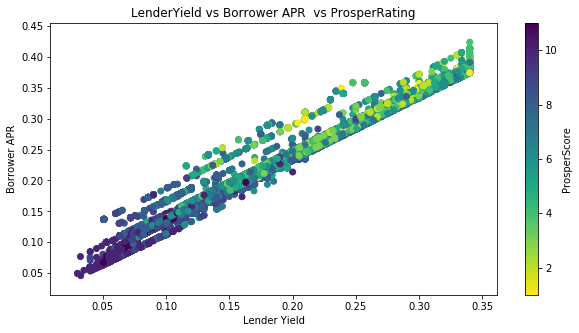

In [51]:
# LenderYield vs Borrower APR  vs ProsperRating
plt.figure(figsize = [10, 5])
plt.scatter(data=df_loans,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.title('LenderYield vs Borrower APR  vs ProsperRating');
plt.xlabel('Lender Yield');
plt.ylabel('Borrower APR');


> We can see that the relationship between all variables are clear. Borrower APR and Lender yield are directly positively correlated as when the interest borrowers pays more , the lender yield will increase. Higher the prosper score lower will lower borrower apr and then the lender yield will also be lower. 

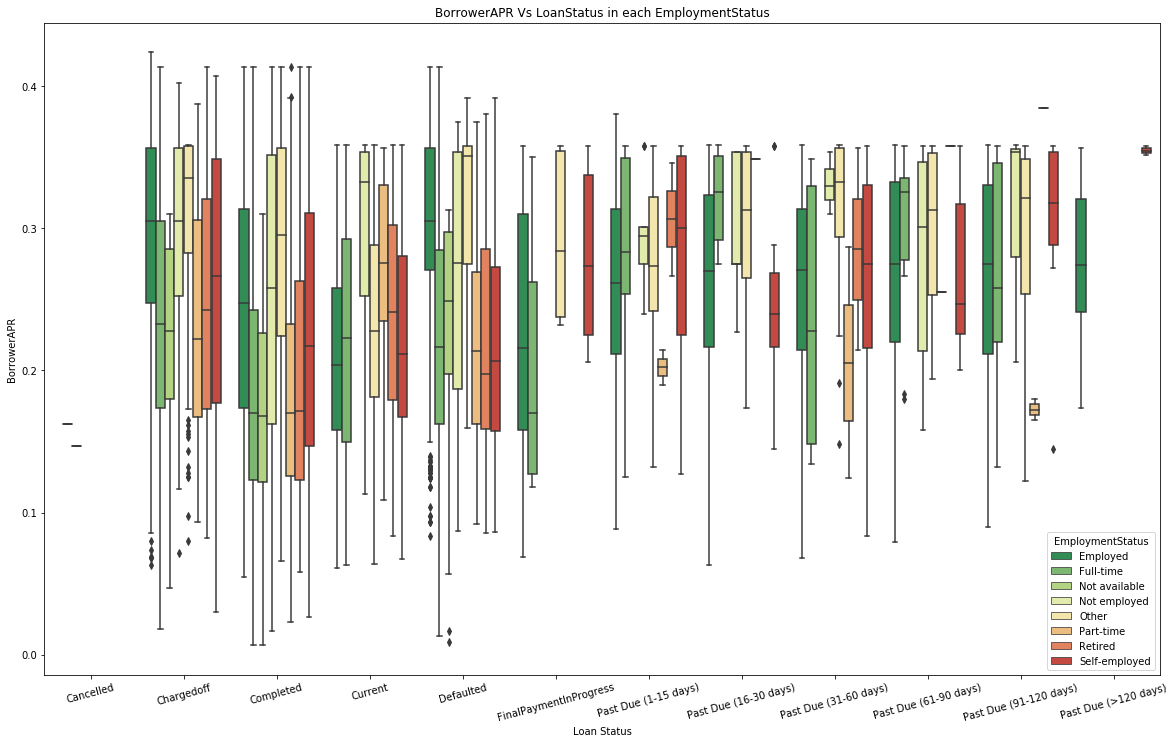

In [52]:
# LoanStatus Vs BorrowerAPR in each EmploymentStatus
plt.figure(figsize=[20,12])
sb.boxplot(x="LoanStatus", y="BorrowerAPR", hue="EmploymentStatus", data=df_loans, palette="RdYlGn_r");
plt.title('BorrowerAPR Vs LoanStatus in each EmploymentStatus');
plt.xlabel('Loan Status');
plt.ylabel('BorrowerAPR');
plt.xticks(rotation = 15);


* For each category of loan status, the lowest APR is for Employed and Full-time. Whereas highest APR is for Not employed.
* Most of the high BorrowerAPR are on the chargeoff, completed and current.
* We notice some outliers in chargeoff and defaulted loan status.

In [53]:
df_loans['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

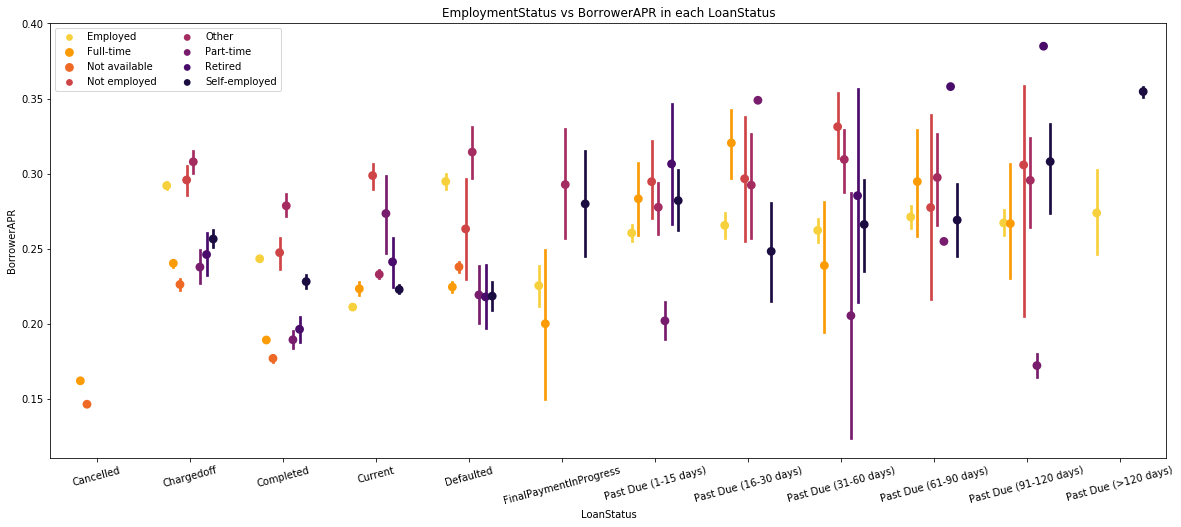

In [54]:
# EmploymentStatus vs BorrowerAPR in each LoanStatus
fig = plt.figure(figsize = [20,8])
ax = sb.pointplot(data = df_loans, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'EmploymentStatus', linestyles = "",
                  dodge = 0.5, palette = 'inferno_r')
plt.title('EmploymentStatus vs BorrowerAPR in each LoanStatus')
plt.ylabel('BorrowerAPR')
plt.xticks(rotation=15)
plt.legend(ncol=2)
plt.show();

* Past Due loans generally have higher interest rates in all employment statuses


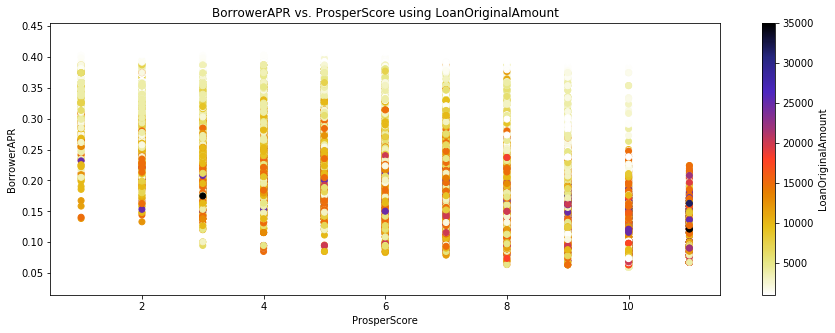

In [55]:
# BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper
plt.figure(figsize = [15, 5]) 
cm = plt.cm.get_cmap('CMRmap_r')
plt.scatter(data=df_loans[df_loans['StatedMonthlyIncome']<20000],x='ProsperScore',y='BorrowerAPR',c='LoanOriginalAmount',cmap=cm) 
plt.colorbar(label = 'LoanOriginalAmount')
plt.title('BorrowerAPR vs. ProsperScore using LoanOriginalAmount')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

* We can see that most of the loans with higher amounts (>$20,000) are taken by people with higher prosper score (10 and above)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>Relation between EmploymentStatus, LoanStatus and BorrowerAPR: <br>
* We see that Employed people are diverse regarding the Loan Status and BorrowerAPR as they have sometimes high borrower rate like in chargeoff and sometimes low borrower rate like in the past dues.<br>
* Employees with Full-Time and part-time tend to have lower BorrowerAPR across all loan status categories.<br>
* Employees with Not-Employed & Self-Employed tend to have higher BorrowerAPR in some areas like the past dues but lower BorrowerAPR in the current and completed status.<br>
<br><br>


### Were there any interesting or surprising interactions between features?

>Scatter plot and Heatmap were also created to find out that ProsperScore and BorrowerAPR were negatively correlated as higher the prosper score lower will be the risk attached hence lower will be the APR and that further lowers down the yield.


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!